In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def showCatsBy(by,xlabel=''): #views
  if xlabel == '': xlabel = by 
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= xlabel +' por Categoría', ylabel="Categoría", xlabel=xlabel)

In [4]:
def correct_outliers_cats(col, q_min=0.025, q_max=0.95):
  outliers = data_cat.groupby('snippet.title').agg(
      out_min = (col, lambda x : x.quantile(q_min)),
      out_max = (col, lambda x : x.quantile(q_max))
    )
  outliers.reset_index(inplace=True)
  display(outliers)
  

  for index, row in outliers.iterrows():
    cat, omin, omax = row

    nCat = len(data_cat[data_cat['snippet.title'] == cat])
    nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
    nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])
    print( f"{cat} por {col}".upper() )
    print( f'Frecuencia: {nCat} \t f. outliers min: {nCatOutMin} \t f. outliers max: {nCatOutMax}' )

    #corrigiendo outliers máximos
    if (nCatOutMax > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>omax), col ] = [omax]*nCatOutMax
    #corrigiendo outliers mínimos
    if (nCatOutMin > 0):
      data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]<omin), col ] = [omin]*nCatOutMin
    

## 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

### Corrigiendo outliers de dislikes por categoría

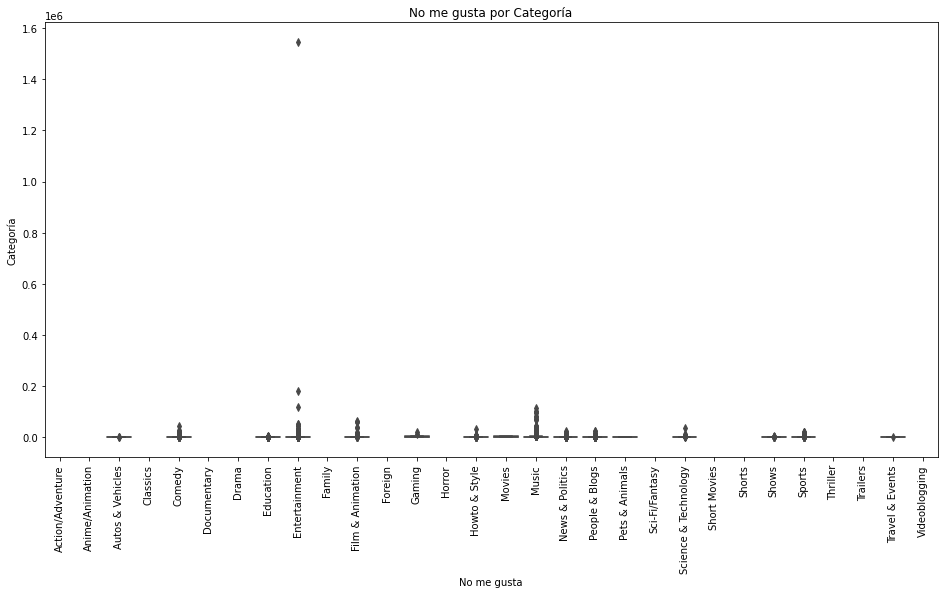

In [5]:
showCatsBy('dislikes','No me gusta')

In [6]:
correct_outliers_cats('dislikes')

,snippet.title,out_min,out_max
0,Action/Adventure,NaN,NaN
1,Anime/Animation,NaN,NaN
2,Autos & Vehicles,18.150,924.70
3,Classics,NaN,NaN
4,Comedy,39.775,5936.30
5,Documentary,NaN,NaN
6,Drama,NaN,NaN
7,Education,0.000,634.60
8,Entertainment,6.000,2320.00
9,Family,NaN,NaN


ACTION/ADVENTURE POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
ANIME/ANIMATION POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
AUTOS & VEHICLES POR DISLIKES
Frecuencia: 34 	 f. outliers min: 1 	 f. outliers max: 2
CLASSICS POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
COMEDY POR DISLIKES
Frecuencia: 1152 	 f. outliers min: 29 	 f. outliers max: 58
DOCUMENTARY POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
DRAMA POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
EDUCATION POR DISLIKES
Frecuencia: 813 	 f. outliers min: 0 	 f. outliers max: 41
ENTERTAINMENT POR DISLIKES
Frecuencia: 7781 	 f. outliers min: 177 	 f. outliers max: 389
FAMILY POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
FILM & ANIMATION POR DISLIKES
Frecuencia: 539 	 f. outliers min: 14 	 f. outliers max: 27
FOREIGN POR DISLIKES
Frecuencia: 0 	 f. outliers min: 0 	 f. outliers max: 0
GAMING POR D

C:\Users\GART-03\AppData\Local\Temp\ipykernel_7648\3351928774.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMax = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>omax])
C:\Users\GART-03\AppData\Local\Temp\ipykernel_7648\3351928774.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nCatOutMin = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]<omin])


[Text(0.5, 1.0, 'No me gusta por categoría'),
 Text(0, 0.5, 'Categoría'),
 Text(0.5, 0, 'No me gusta')]

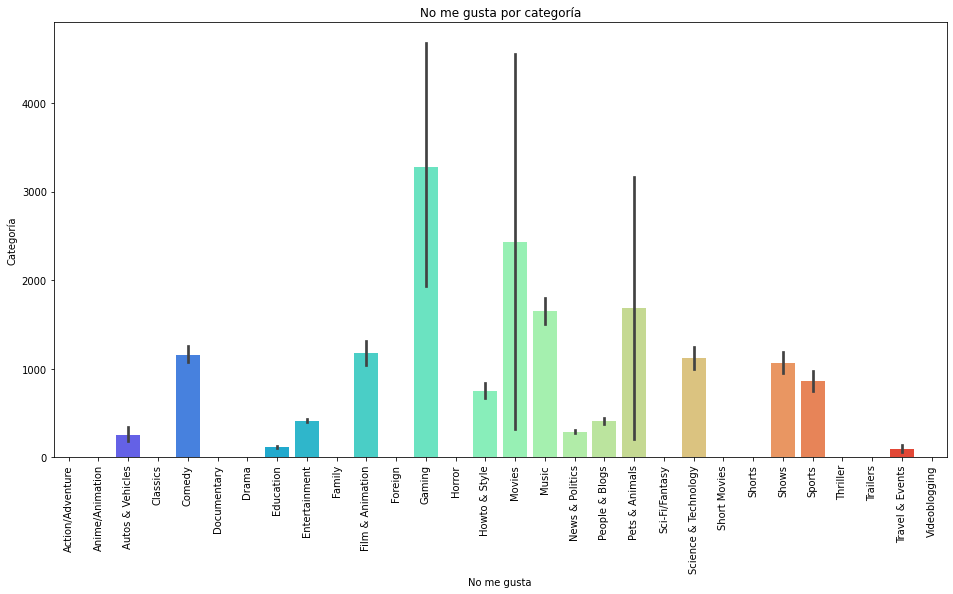

In [7]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="dislikes", data=data_cat, palette='rainbow').set(
  title='No me gusta por categoría', ylabel="Categoría", xlabel='No me gusta')

### Comparación de Me gusta / No me gusta (likes / dislikes)

In [8]:
data_cat_ld = data_cat[["snippet.title","likes","dislikes"]].melt('snippet.title', var_name='cols', value_name='vals')
data_cat_ld.head()

,snippet.title,cols,vals
0,Entertainment,likes,5974.0
1,News & Politics,likes,8017.0
2,Entertainment,likes,2456.0
3,Entertainment,likes,1447.0
4,Education,likes,0.0


[Text(0.5, 1.0, 'Me gusta y No me gusta por Categoría')]

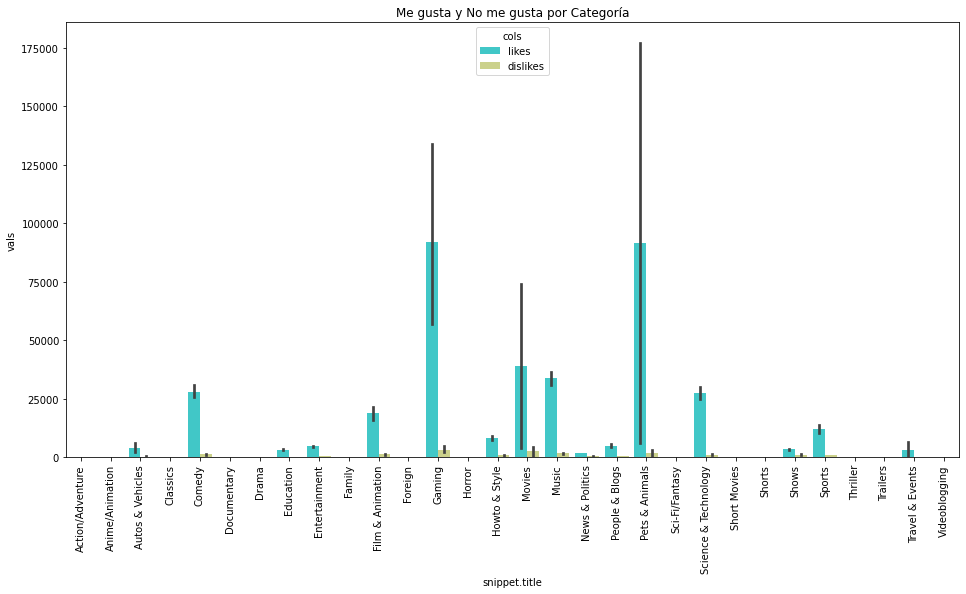

In [9]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="vals", hue='cols', data=data_cat_ld, palette='rainbow').set(title='Me gusta y No me gusta por Categoría')

In [10]:
data_cat_ld.groupby('snippet.title').describe()

vals                                       \
                        count          mean           std      min   
snippet.title                                                        
Action/Adventure          0.0           NaN           NaN      NaN   
Anime/Animation           0.0           NaN           NaN      NaN   
Autos & Vehicles         68.0   2158.110662   4435.536959   18.150   
Classics                  0.0           NaN           NaN      NaN   
Comedy                 2304.0  14580.789388  32857.227805   39.775   
Documentary               0.0           NaN           NaN      NaN   
Drama                     0.0           NaN           NaN      NaN   
Education              1626.0   1649.916482   3211.436958    0.000   
Entertainment         15562.0   2508.378679   6208.456085    6.000   
Family                    0.0           NaN           NaN      NaN   
Film & Animation       1078.0  10035.957699  23865.370723   34.450   
Foreign                   0.0           NaN           NaN      NaN   
Gaming                   44.0  47736.848295  80816.079049  317.850   
Horror                    0.0           NaN           NaN      NaN   
Howto & Style           972.0   4501.693801   7814.724705   11.125   
Movies                    4.0  20751.637500  35557.655053  313.650   
Music                  2556.0  17684.981768  41095.967582   29.000   
News & Politics        5164.0   1016.856991   1709.436077    0.000   
People & Blogs         2510.0   2700.122629   7218.145461    0.000   
Pets & Animals            4.0  46590.300000  87009.121937  210.775   
Sci-Fi/Fantasy            0.0           NaN           NaN      NaN   
Science & Technology    614.0  14238.326059  21625.812035   91.000   
Short Movies              0.0           NaN           NaN      NaN   
Shorts                    0.0           NaN           NaN      NaN   
Shows                   246.0   2207.516667   1593.834095   54.250   
Sports                  712.0   6389.169417  12899.761847   19.000   
Thriller                  0.0           NaN           NaN      NaN   
Trailers                  0.0           NaN           NaN      NaN   
Travel & Events           8.0   1554.612500   2857.375023   58.675   
Videoblogging             0.0           NaN           NaN      NaN   

                                                                     
                             25%        50%          75%        max  
snippet.title                                                        
Action/Adventure             NaN        NaN          NaN        NaN  
Anime/Animation              NaN        NaN          NaN        NaN  
Autos & Vehicles       142.00000   391.0000   2159.50000   23375.25  
Classics                     NaN        NaN          NaN        NaN  
Comedy                 482.25000  2144.0000   9777.00000  169444.80  
Documentary                  NaN        NaN          NaN        NaN  
Drama                        NaN        NaN          NaN        NaN  
Education               42.00000   205.5000   2327.50000   17165.60  
Entertainment          133.00000   447.0000   1608.75000   33113.00  
Family                       NaN        NaN          NaN        NaN  
Film & Animation       409.75000  1585.0000   6029.50000  122908.10  
Foreign                      NaN        NaN          NaN        NaN  
Gaming                2045.75000  6612.0000  39767.00000  296821.65  
Horror                       NaN        NaN          NaN        NaN  
Howto & Style          197.50000  1025.5000   3206.25000   31724.25  
Movies                3172.76250  4340.7500  21919.62500   74011.40  
Music                  432.75000  2210.5000  10492.95000  202921.85  
News & Politics         96.00000   345.5000   1113.25000    8017.00  
People & Blogs         114.00000   423.0000   1591.25000   38590.10  
Pets & Animals        2424.53125  4546.7375  48712.50625  177056.95  
Sci-Fi/Fantasy               NaN        NaN          NaN        NaN  
Science & Technology   758.50000  

### Ratio Me gusta / No me gusta (likes / dislikes)

In [11]:
cat_ldratio = data_cat[['snippet.title','likes','dislikes']]
cat_ldratio['ratio'] = data_cat['likes'] / data_cat['dislikes']
cat_ldratio

C:\Users\GART-03\AppData\Local\Temp\ipykernel_7648\2768311842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ldratio['ratio'] = data_cat['likes'] / data_cat['dislikes']


,snippet.title,likes,dislikes,ratio
0,Entertainment,5974.0,1414.00,4.224894
1,News & Politics,8017.0,1434.55,5.588512
2,Entertainment,2456.0,439.00,5.594533
3,Entertainment,1447.0,145.00,9.979310
4,Education,0.0,0.00,NaN
...,...,...,...,...
16804,Howto & Style,334.0,27.00,12.370370
16805,Entertainment,924.0,77.00,12.000000
16806,Entertainment,256.0,45.00,5.688889
16807,Comedy,8839.0,268.00,32.981343


In [12]:
cat_ldratio.describe()

,likes,dislikes,ratio
count,16809.000000,16809.000000,1.651500e+04
mean,9182.756366,588.113755,inf
std,23545.006531,1128.746700,NaN
min,0.000000,0.000000,1.215517e-01
25%,572.000000,70.000000,4.960874e+00
50%,1769.000000,196.000000,9.324324e+00
75%,6504.000000,599.000000,1.931447e+01
max,296821.650000,12154.300000,inf


c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


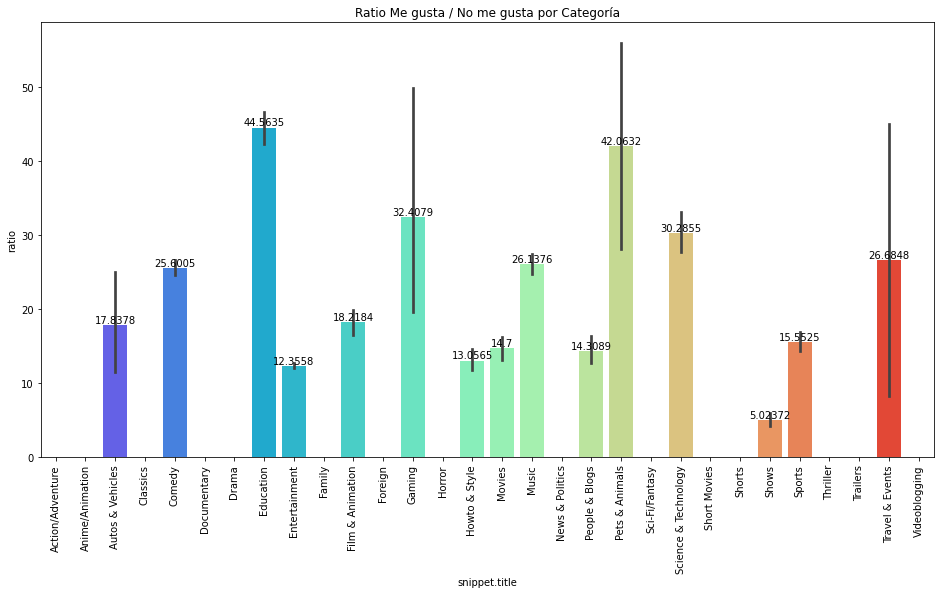

In [13]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
cat_ldratio_plot = sns.barplot(x="snippet.title", y="ratio", data=cat_ldratio, palette='rainbow')
cat_ldratio_plot.set(title='Ratio Me gusta / No me gusta por Categoría')
for i in cat_ldratio_plot.containers: cat_ldratio_plot.bar_label(i,)

Las categorías com mejor ratio de "Me gusta / No me gusta" son Education, con alrededor de 45 me gusta por cada no me gusta y Pets & Animals, con alrededor de 40 me gusta por cada no me gusta.

In [14]:
cat_ldratio_plot.figure.savefig("../graphs/ratio-likes-dislikes_category.png")

In [15]:
%store data_cat
%store cat_ldratio_plot

Stored 'data_cat' (DataFrame)
Stored 'cat_ldratio_plot' (AxesSubplot)
